### Import Libraries

In [2]:
import os
import sys

# Check Python version
print(f"Python Version: {sys.version}")

# Verify if the file exists
print(f"Current Directory: {os.getcwd()}")
print(f"Files: {os.listdir('.')}")

Python Version: 3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]
Current Directory: C:\Users\aksha\OneDrive\Desktop\1_Bhrathi_DPP\1_Bhrathi_DPP
Files: ['.ipynb_checkpoints', '1_DataAnalysis.ipynb', '2_Preprocessing_File.ipynb', '2_SVC_Bharathi.rar', '2_SVC_CLSTM_ModelTraining_file.ipynb', '2_SVC_ModelTraining_file.ipynb', 'input', 'lib_file.pyc', 'raw_dataset']


In [4]:
import os

for root, dirs, files in os.walk('.'):
    for file in files:
        if file == 'lib_file.py':
            print(f"Found: {os.path.join(root, file)}")

In [5]:
import sys

print("PYTHONPATH:")
for path in sys.path:
    print(path)

PYTHONPATH:
C:\spark-3.3.1-bin-hadoop2\python
C:\Users\aksha\AppData\Local\Programs\Python\Python311\python311.zip
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib
C:\Users\aksha\AppData\Local\Programs\Python\Python311\DLLs
C:\Users\aksha\AppData\Local\Programs\Python\Python311

C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\win32
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\win32\lib
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\Pythonwin


In [6]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import os
for dirname,_,filenames in os.walk('raw_dataset'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

raw_dataset\Suicide_Detection.csv


### Data Loading

In [7]:
df = pd.read_csv('raw_dataset/Suicide_Detection.csv')

### Data Preprocessing

***Preliminary Analysis***

In [8]:
df.shape

(232074, 3)

In [9]:
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [10]:
df.tail()

,Unnamed: 0,text,class
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide
232073,348110,I still haven't beaten the first boss in Hollo...,non-suicide


In [11]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
df['class'].unique().tolist()

['suicide', 'non-suicide']

In [13]:
df['class'] = df['class'].map({'suicide': 'depression', 'non-suicide': 'no-depression'})

In [14]:
df['class'].value_counts()

class
depression       116037
no-depression    116037
Name: count, dtype: int64

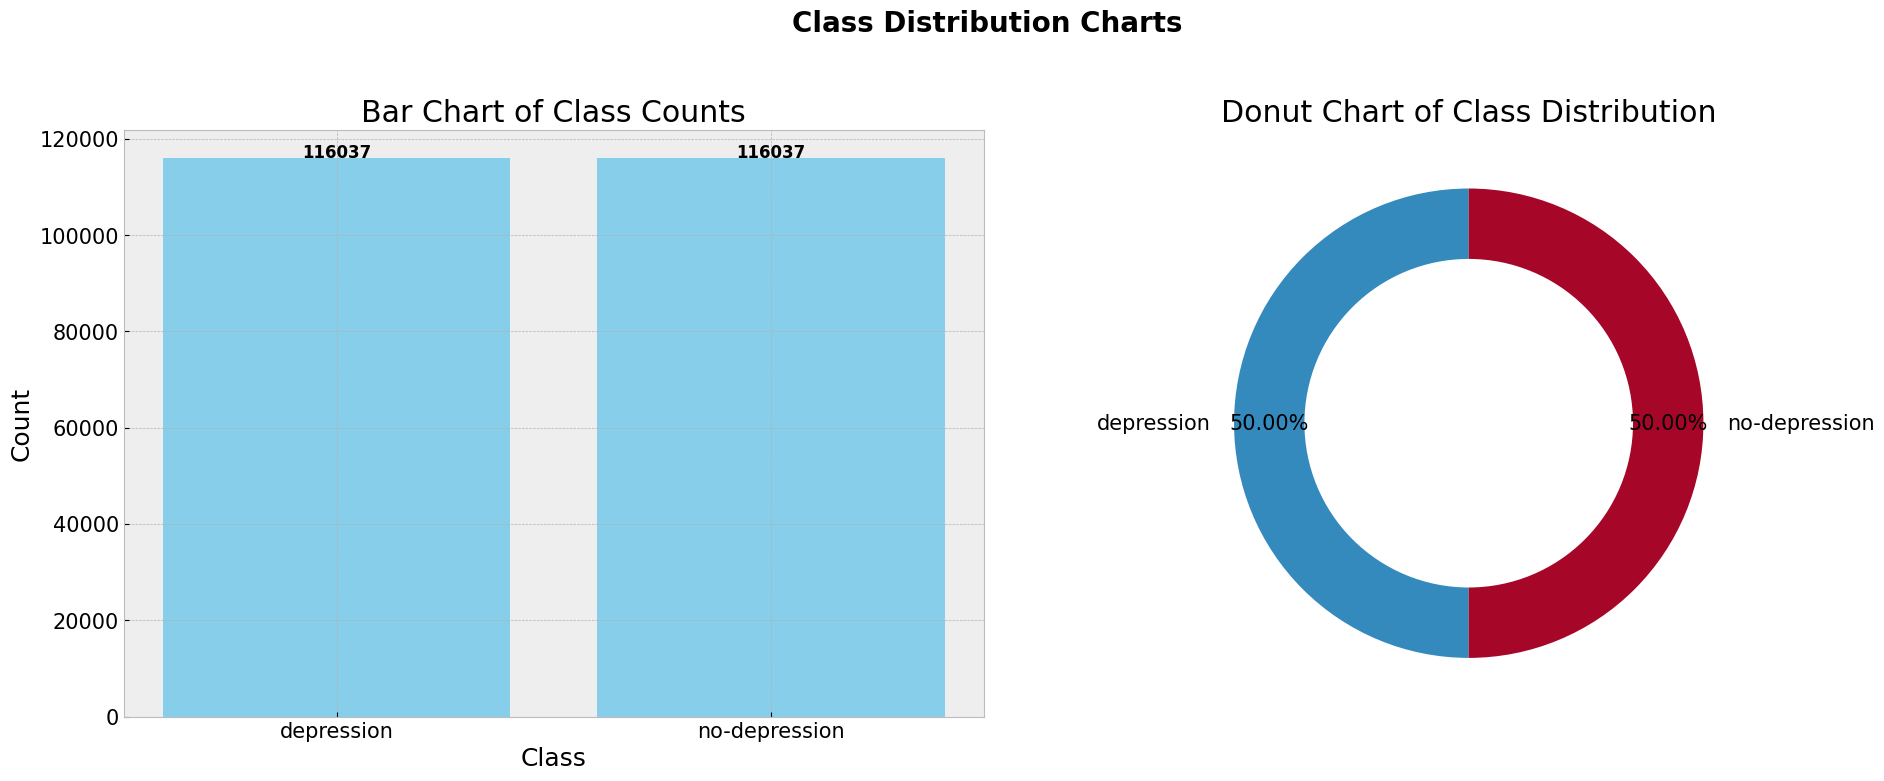

In [15]:
with plt.style.context('bmh'):
    plt.rcParams['font.size'] = 15
    fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    
    chart_labels = list(dict(df['class'].value_counts()).keys())
    chart_data = list(dict(df['class'].value_counts()).values())
    
    # Bar chart
    axis[0].bar(x=chart_labels, height=chart_data, color='skyblue')
    axis[0].set_title('Bar Chart of Class Counts')
    axis[0].set_xlabel('Class')
    axis[0].set_ylabel('Count')
    for i, value in enumerate(chart_data):
        axis[0].text(i, value + 0.5, str(value), ha='center', fontsize=12, fontweight='bold')
    
    # Donut chart
    axis[1].pie(x=chart_data, labels=chart_labels, autopct='%.2f%%', startangle=90, pctdistance=0.85)
    axis[1].set_title('Donut Chart of Class Distribution')
    center_circle = plt.Circle((0, 0), 0.7, fc='white')
    fig.gca().add_artist(center_circle)
    
    fig.suptitle('Class Distribution Charts', fontsize=20, fontweight='bold')
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    
    plt.show()

In [16]:
df.to_csv('input/Depression_Detection.csv', index=False, encoding='utf-8')

In [17]:
df.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,depression
1,Am I weird I don't get affected by compliments...,no-depression
2,Finally 2020 is almost over... So I can never ...,no-depression
3,i need helpjust help me im crying so hard,depression
4,"I’m so lostHello, my name is Adam (16) and I’v...",depression


In [18]:
df['class'].unique().tolist()

['depression', 'no-depression']

In [19]:
df['class'].value_counts()

class
depression       116037
no-depression    116037
Name: count, dtype: int64